In [2]:
import xarray

In [3]:
file_name = 'long_eval_2048x2048_64x64'
data = xarray.open_dataset(f'./content/'+ file_name +'.nc', chunks={'time': '100MB'})
data

<xarray.Dataset>
Dimensions:  (time: 3477, x: 64, y: 64, sample: 16)
Coordinates:
  * time     (time) float64 0.0 0.07012 0.1402 0.2104 ... 243.6 243.7 243.8
  * x        (x) float64 0.04909 0.1473 0.2454 0.3436 ... 5.94 6.038 6.136 6.234
  * y        (y) float64 0.04909 0.1473 0.2454 0.3436 ... 5.94 6.038 6.136 6.234
  * sample   (sample) int32 0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15
Data variables:
    u        (sample, time, x, y) float32 dask.array<chunksize=(16, 381, 64, 64), meta=np.ndarray>
    v        (sample, time, x, y) float32 dask.array<chunksize=(16, 381, 64, 64), meta=np.ndarray>
Attributes: (12/16)
    domain_size_multiple:          1
    full_config_str:               \n# Macros:\n# ===========================...
    init_cfl_safety_factor:        0.5
    init_peak_wavenumber:          4.0
    maximum_velocity:              7.0
    ndim:                          2
    ...                            ...
    simulation_time:               240.0
    stable_time_step:              0.007012483601762931
    time_subsample_factor:         1
    tracing_max_duration_in_msec:  100.0
    warmup_grid_size:              2048
    warmup_time:                   40.0

In [5]:
data.isel(sample=3)

<xarray.Dataset>
Dimensions:  (time: 3477, x: 64, y: 64)
Coordinates:
  * time     (time) float64 0.0 0.07012 0.1402 0.2104 ... 243.6 243.7 243.8
  * x        (x) float64 0.04909 0.1473 0.2454 0.3436 ... 5.94 6.038 6.136 6.234
  * y        (y) float64 0.04909 0.1473 0.2454 0.3436 ... 5.94 6.038 6.136 6.234
    sample   int32 3
Data variables:
    u        (time, x, y) float32 dask.array<chunksize=(381, 64, 64), meta=np.ndarray>
    v        (time, x, y) float32 dask.array<chunksize=(381, 64, 64), meta=np.ndarray>
Attributes: (12/16)
    domain_size_multiple:          1
    full_config_str:               \n# Macros:\n# ===========================...
    init_cfl_safety_factor:        0.5
    init_peak_wavenumber:          4.0
    maximum_velocity:              7.0
    ndim:                          2
    ...                            ...
    simulation_time:               240.0
    stable_time_step:              0.007012483601762931
    time_subsample_factor:         1
    tracing_max_duration_in_msec:  100.0
    warmup_grid_size:              2048
    warmup_time:                   40.0

<AxesSubplot: >

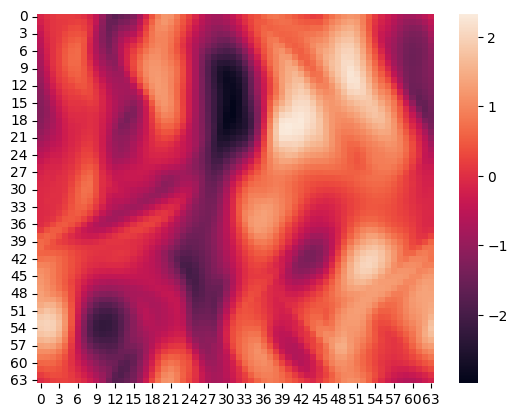

In [18]:
seaborn.heatmap(data.u[0,100,:,:])

In [19]:
downsample_factor = 2 #divides by this
data = data.coarsen(x=downsample_factor).mean().coarsen(y=downsample_factor).mean()

<AxesSubplot: >

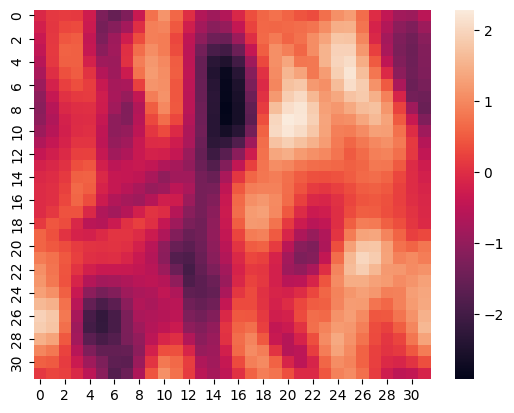

In [20]:
seaborn.heatmap(data.u[0,100,:,:])

In [21]:
save_dataset = data
save_dataset_path = 'coarsened_dataset.nc'
save_dataset.to_netcdf(path=save_dataset_path)

<AxesSubplot: >

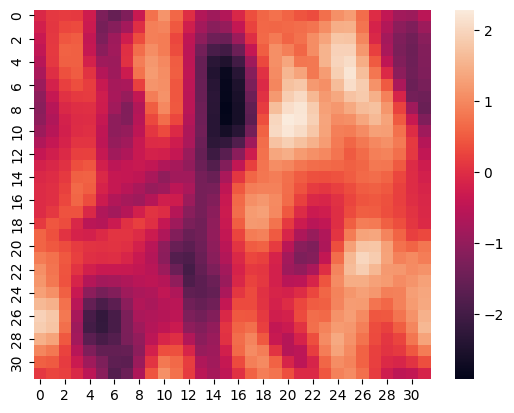

In [22]:
data = xarray.open_dataset(save_dataset_path, chunks={'time': '100MB'})
seaborn.heatmap(data.u[0,100,:,:])